In [11]:
import scipy.io.wavfile as wav
import scipy.signal as signal
import scipy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

filename = '123T.WAV'
fs, data = wav.read(filename)
print(fs)

11025


C:\Users\user\AppData\Local\Temp\ipykernel_13032\1212362953.py:10: WavFileWarning: Reached EOF prematurely; finished at 8257580 bytes, expected 8257585 bytes from header.
  fs, data = wav.read(filename)


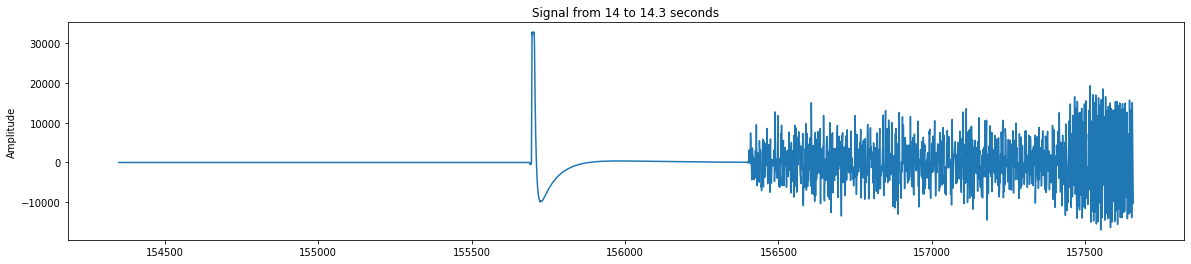

In [12]:
def plot_graph(start,final,datar):
    plt.figure(figsize=(20,4))
    plt.plot(range(int(start*fs),int(final*fs)),datar[int(start*fs):int(final*fs)])
    plt.xlabel("")
    plt.ylabel("Amplitude")
    plt.title(f'Signal from {start} to {final} seconds')
    plt.show()

#Plot graph from ... to ... seconds
plot_graph(14,14.3,data)

c:\code\test_project\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


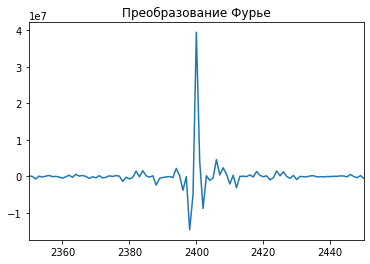

In [14]:
plt.plot(fft.fft(data[33*fs:34*fs]))
plt.xlim((2350,2450))
plt.title("Преобразование Фурье")
plt.show()

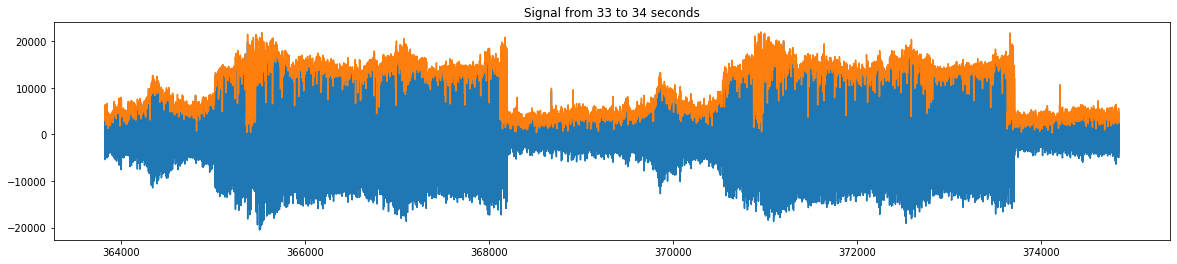

In [15]:
#Amplitude modulation
def hilbert(data):
    analytical_signal = signal.hilbert(data)
    amplitude_signal = np.abs(analytical_signal)
    return amplitude_signal

#modulated signal
plt.figure(figsize=(20,4))
data_am = hilbert(data)
plt.plot(range(33*fs,34*fs),data[33*fs:34*fs])
plt.plot(range(33*fs,34*fs),data_am[33*fs:34*fs])
plt.title(f'Signal from 33 to 34 seconds')
plt.show()

In [16]:

def print_image(data_am,fs,antenna_coef):
    frame_width = int(fs/2)
    arr = np.zeros((frame_width,data_am.shape[0]//frame_width))
    w, h = frame_width, (data_am.shape[0])//frame_width

    image = Image.new('RGB', (w, h))
    px, py = 0, 0
    for p in range(data_am.shape[0]):
        bright = int(data_am[p]//antenna_coef-antenna_coef) # convert to 0,...,255 range of brightness
        if bright < 0: bright = 0
        if bright > 255: bright = 255
        image.putpixel((px, py), (bright, bright, bright)) # in grey frames
        arr[px][py] = 255-bright
        px += 1
        if px >= w:
            px = 0
            py += 1
            if py >= h:
                break
  #plt.figure(figsize=(10,10))
    image = image.resize((w, h*5))
    plt.imshow(image)
    image.save("out.jpg", "JPEG") 
    plt.show()
    return arr


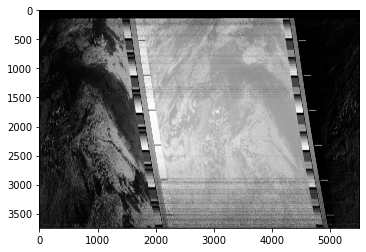

In [17]:
arr = print_image(data_am,fs,64)

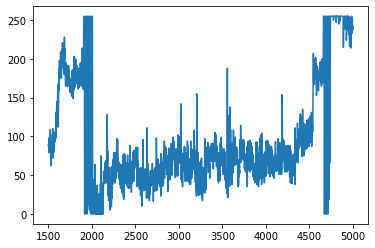

In [18]:

test = [arr[j][500] for j in range(1500,5000)]

#print(test)
#plt.imshow(test,cmap='Greys', aspect='auto')
#print(test)
#print(test)
#print(len(test))

plt.plot(range(1500,5000),test)
plt.show()

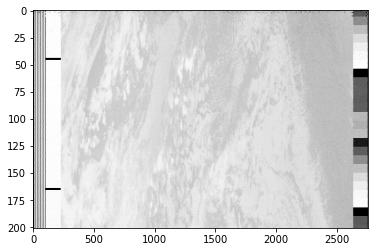

In [19]:
start = []
end = []
tempm = []

im = []

def masst(ms,sta,fin,delta):
    tempo = [ms[j][sta-1] for j in range(0,5000)]
    tempo1 = [ms[j][sta-1] for j in range(4500,5000)]
    k = 0
    st = 0
    for j in range(len(tempo)):
        if (tempo[j] - tempo[j+1]) > delta and k == 0:
            st = j
            he = sta-1
            k = 1
        if (tempo[j] - tempo[j+1]) > delta and k == 1:
            fn = j
            start.append(he)
            start.append(st-10)
            break
    k = 0
    for j in range(len(tempo1)):
        if (tempo1[j] - tempo1[j+1]) > delta and k == 0:
            st = j + 4500
            he = sta - 1
            k = 1
        if (tempo1[j] - tempo1[j+1]) > delta and k == 1:
            fn = j
            end.append(he)
            end.append(st-10)
            break
    for i in range(sta,fin):
        temp = [ms[j][i] for j in range(0,2300)]
        k = 0
        for j in range(len(temp)):
            if (temp[j] - temp[j+1]) > delta and k == 0:
                st = j
                k = 1
            if (temp[j] - temp[j+1]) > delta and k == 1:
                fn = j
                start.append(st-10)
                break

masst(arr,300,500,75)

#print(start)
#print(end)
#print(len(start))
lens = end[1]-start[1]+2
#print(lens)

def angle():
    temp = 0
    st = 1
    for j in range(start[0], len(start)+349):
        fin = []
        for i in range(5512):
            if i == start[st]:
                temp = 1
            if temp == 1:
                fin.append(arr[i][j])
            if i == start[st]+lens:
                temp = 0
        im.append(fin)
        st+=1
        if st>=len(start):
            break
angle() 
  
plt.imshow(im,cmap='Greys', aspect='auto')

In [20]:
D_value = [276.6067, 0.051111, 1.405783e-6, 276.6119, 0.05109, 1.496037e-6, 276.6311, 0.051033, 1.49699e-6, 276.6268, 0.051058, 1.49311e-6]

Res_temp = 0
temp = 0

C_e = im[175][2000]
C_s = im[100][111]

#print(C_s)

for i in range(201):
  if im[i][2750] == 255.0 and im[i + 1][2750] == 255.0:
    temp += 1
  if im[i + 1][2750] < 255.0:
    temp = 0
  if temp == 7:
    Res_temp = i + 2
    break
T_temp = 0
C_bb_temp = 0
for i in range(4):                                                                          #work with temp of termoresistors
  C_prt_temp = 0
  for j in range(8):
    C_prt_temp += im[i * 8 + Res_temp + j][2750]
  C_prt = C_prt_temp / 8
  C_bb_temp += C_prt
  
  T_temp += D_value[i * 3] + D_value[i * 3 + 1] * C_prt + D_value[i * 3 + 2] * C_prt ** 2   #(7.1.2.4-1)

C_bb = C_bb_temp / 4

T_bb = T_temp/4                                                                             #(7.1.2.4-2)

T_bb_eff = 1.621256 + 0.998015 * T_bb                                                       #(7.1.2.4-3)

N_bb = 1.1910427e-5 * 2695.9743 ** 3 / (math.exp(2695.9743 * 1.4387752 / T_bb_eff) - 1)     #(7.1.2.4-4)
#print(N_bb)

N_lin = N_bb*(C_s - C_e) / (C_s - C_bb)                                                     #(7.1.2.4-5)

T_e_eff = 1.4387752 * 2695.9743 / math.log(1+1.1910427e-5 * 2695.9743 ** 3 / N_lin)         #(7.1.2.4-8)

T_e = (T_e_eff - 1.621256) / 0.998015                                                       #(7.1.2.4-9)
print("Температура в Цельсиях:",round(T_e - 273,3))

Температура в Цельсиях: -7.731
